# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

## Load data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
y = iris.target

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

In [6]:
import matplotlib.pyplot as plt

[ 3  2  2  1  2  3  1  2  1  2  3  2  2  1  4  4  3  3  4  3  3  3  1  3
  2  2  2  3  3  2  2  3  3  4  2  2  4  2  1  3  2  1  1  2  3  2  3  1
  3  2  7  6  7  4  6  4  5  2  6  3  2  5  5  5  4  7  4  4  5  4  5  5
  5  5  6  6  7  7  5  4  4  4  4  5  3  5  7  5  4  4  4  5  4  2  4  4
  4  5  3  4  5  4  7  5  6  9  2  8  7  8  6  6  7  4  4  6  6  9  9  5
  7  4  9  5  7  8  5  5  6  8  8 10  6  5  5  9  5  6  5  7  7  7  4  7
  7  7  5  6  5  5]


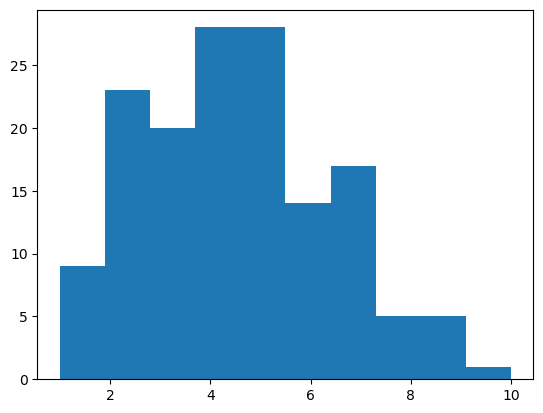

In [7]:
sepal_length = X[:, 0]

# discretize sepal_length
# generate linspace for sepal_length
bins = np.linspace(sepal_length.min(), sepal_length.max(), 10)

sepal_length = np.digitize(sepal_length, bins)

print(sepal_length)

plt.hist(sepal_length)
plt.show()

In [8]:
xvalues = np.unique(sepal_length).tolist()
yvalues = np.unique(y).tolist()

print(xvalues, yvalues)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 1, 2]


In [9]:
categories = list(map(lambda x: iris.target_names[x], yvalues))
categories

['setosa', 'versicolor', 'virginica']

In [10]:
N = len(sepal_length)
obs = pd.DataFrame(0, columns=categories, index=xvalues)
for i in range(N):
    xi = sepal_length[i]
    yi = categories[y[i]]
    obs[yi][xi] += 1
obs

,setosa,versicolor,virginica
1,9,0,0
2,19,3,1
3,17,3,0
4,5,18,5
5,0,15,13
6,0,5,9
7,0,6,11
8,0,0,5
9,0,0,5
10,0,0,1


In [11]:
m = obs.sum(axis=1)
m

1      9
2     23
3     20
4     28
5     28
6     14
7     17
8      5
9      5
10     1
dtype: int64

In [12]:
l = obs.sum(axis=0)
l

setosa        50
versicolor    50
virginica     50
dtype: int64

In [13]:
obs["m"] = m
obs.loc["l"] = l
obs

,setosa,versicolor,virginica,m
1,9.0,0.0,0.0,9.0
2,19.0,3.0,1.0,23.0
3,17.0,3.0,0.0,20.0
4,5.0,18.0,5.0,28.0
5,0.0,15.0,13.0,28.0
6,0.0,5.0,9.0,14.0
7,0.0,6.0,11.0,17.0
8,0.0,0.0,5.0,5.0
9,0.0,0.0,5.0,5.0
10,0.0,0.0,1.0,1.0


In [14]:
joint_proba = pd.DataFrame(0, columns=categories, index=xvalues)
for x in xvalues:
    joint_proba.loc[x] = obs[categories].loc[x] / N
joint_proba

,setosa,versicolor,virginica
1,0.060000,0.000000,0.000000
2,0.126667,0.020000,0.006667
3,0.113333,0.020000,0.000000
4,0.033333,0.120000,0.033333
5,0.000000,0.100000,0.086667
6,0.000000,0.033333,0.060000
7,0.000000,0.040000,0.073333
8,0.000000,0.000000,0.033333
9,0.000000,0.000000,0.033333
10,0.000000,0.000000,0.006667


In [15]:
p_y_x = pd.DataFrame(0, columns=categories, index=xvalues)
for x in xvalues:
    p_y_x.loc[x] = obs[categories].loc[x] / obs["m"].loc[x]
p_y_x

,setosa,versicolor,virginica
1,1.000000,0.000000,0.000000
2,0.826087,0.130435,0.043478
3,0.850000,0.150000,0.000000
4,0.178571,0.642857,0.178571
5,0.000000,0.535714,0.464286
6,0.000000,0.357143,0.642857
7,0.000000,0.352941,0.647059
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000
10,0.000000,0.000000,1.000000


In [16]:
pred_bin = np.digitize(4.75, bins)
pred_bin

2

In [17]:
predictions = np.random.choice(categories, size=10, p=p_y_x.loc[pred_bin]).tolist()
predictions

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa']

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

In [18]:
p_x_y = pd.DataFrame(0, columns=categories, index=xvalues)
for y in yvalues:
    p_x_y[categories[y]] = obs[categories[y]] / obs[categories[y]].loc["l"]
p_x_y

,setosa,versicolor,virginica
1,0.18,0.00,0.00
2,0.38,0.06,0.02
3,0.34,0.06,0.00
4,0.10,0.36,0.10
5,0.00,0.30,0.26
6,0.00,0.10,0.18
7,0.00,0.12,0.22
8,0.00,0.00,0.10
9,0.00,0.00,0.10
10,0.00,0.00,0.02


In [19]:
print(bins)

[4.3 4.7 5.1 5.5 5.9 6.3 6.7 7.1 7.5 7.9]


In [20]:
sampled_indices = np.random.choice(xvalues, size=10, p=p_x_y["setosa"])
sampled_values = bins[sampled_indices - 1]
print(sampled_values)

[4.3 5.1 5.5 4.7 4.3 4.7 5.1 5.1 4.7 4.7]


## Histogramas

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <BarContainer object of 10 artists>)

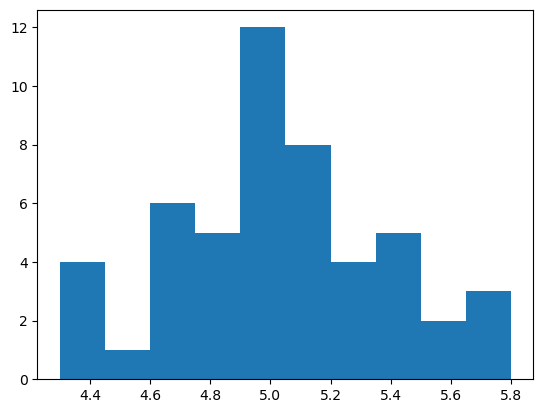

In [21]:
setosa = iris.data[:50]
setosa_sepal_length = setosa[:, 0]
plt.hist(setosa_sepal_length)

(array([ 4.,  1.,  6., 10.,  5.,  8.,  5.,  3.,  5.,  3.]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <BarContainer object of 10 artists>)

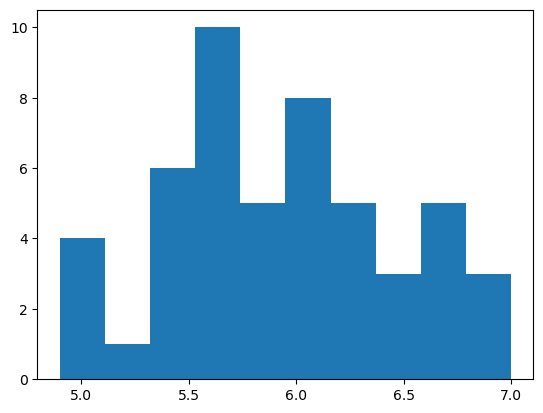

In [22]:
versicolor = iris.data[50:100]
versicolor_sepal_length = versicolor[:, 0]
plt.hist(versicolor_sepal_length)

(array([ 1.,  0.,  5.,  5.,  8.,  9., 10.,  5.,  1.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 10 artists>)

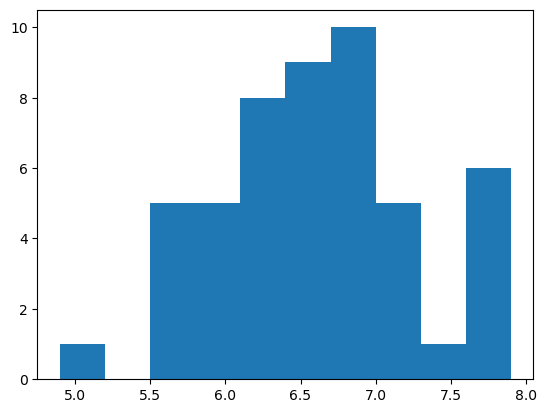

In [23]:
virginica = iris.data[100:150]
virginica_sepal_length = virginica[:, 0]
plt.hist(virginica_sepal_length)

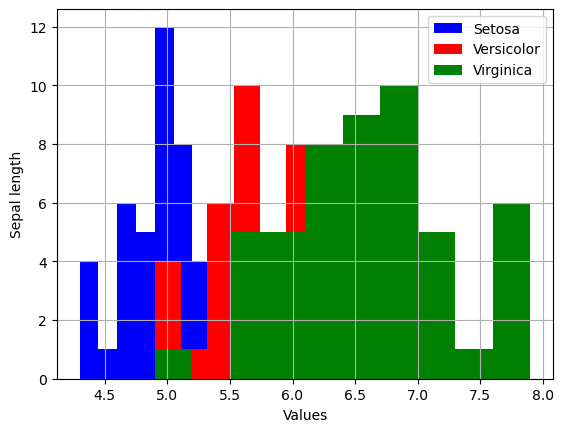

In [24]:
plt.hist(setosa_sepal_length, color="blue", label="Setosa")
plt.hist(versicolor_sepal_length, color="red", label="Versicolor")
plt.hist(virginica_sepal_length, color="green", label="Virginica")
plt.xlabel('Values')
plt.ylabel('Sepal length')
plt.legend()
plt.grid(True)
plt.show()